In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [6]:
img=cv2.imread('./fig/lenna.bmp',cv2.IMREAD_COLOR)
if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image')
cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
import glob

In [ ]:
img_list=glob.glob('../Ch_2/fig/images/*.*')
cv2.namedWindow('scene',cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene',cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)




In [2]:
cap=cv2.VideoCapture(0)
if not cap.isOpened():
    print('video open failed')
    sys.exit()

w=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=int(cap.get(cv2.CAP_PROP_FPS)*0.8)
foucc=cv2.VideoWriter_fourcc(*'DIVX')

    
    
while True:
    ret,frame=cap.read()
    if not ret:
        print('frame read failed')
        break
        
    edge=cv2.Canny(frame,50,150)
    flip=cv2.flip(frame,1)
    cv2.imshow('image',frame)
    cv2.imshow('edge',edge)
    cv2.imshow('flip',flip)
#     out.write('outvideo',flip)
    
    if cv2.waitKey(20)==27:
        break
# out.release()
cap.release()
cv2.destroyAllWindows()

NameError: name 'out' is not defined

In [8]:
def call_mouse(event,x,y,flags,param):
    global oldx,oldy
    
    if event==cv2.EVENT_LBUTTONDOWN:
        oldx,oldy=x,y
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if flags==cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(oldx,oldy),(x,y),(0,0,0),10,cv2.LINE_AA)
            cv2.imshow('image',img)
            oldx,oldy=x,y
            
oldx = oldy = -1            
img=np.full((600,1200,3),(255,255,255),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',call_mouse,img)
cv2.imshow('image',img)


cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
def call_trackbar(pos):
    img[:]=np.round(img1*(pos/255),0).astype(np.uint8)

In [2]:
src1=cv2.imread('./fig/lenna256.bmp',0)
src2=np.zeros((256,256),np.uint8)
cv2.circle(src2,(128,128),100,200,-1)
cv2.circle(src2,(128,128),50,50,-1)

dst1=cv2.add(src1,src2)
dst2=cv2.subtract(src1,src2)
dst3=cv2.addWeighted(src1,0.5,src2,0.5,0)
dst4=cv2.absdiff(src1,src2)

cv2.imshow('src1',src1)
cv2.imshow('src2',src2)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
import matplotlib.pyplot as plt

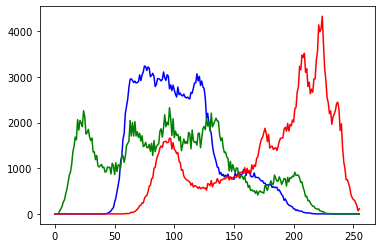

In [6]:
img=cv2.imread('./fig/lenna.bmp',1)
# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist

hist_b=cv2.calcHist([img],[0],None,[256],[0,256])
hist_g=cv2.calcHist([img],[1],None,[256],[0,256])
hist_r=cv2.calcHist([img],[2],None,[256],[0,256])

plt.plot(hist_b,color='b')
plt.plot(hist_g,color='g')
plt.plot(hist_r,color='r')
plt.show()
cv2.namedWindow('image')
cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

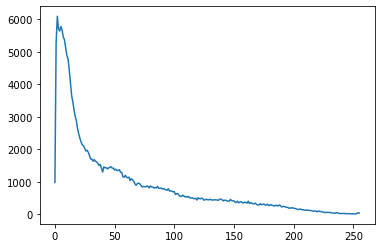

In [16]:
src=cv2.imread('./fig1/manjang.jpg',cv2.IMREAD_REDUCED_GRAYSCALE_2)
# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
# minVal, maxVal, minLoc, maxLoc=cv2.minMaxLoc(src)
# print(minVal,maxVal)

# dst_norm=np.clip((src-minVal)*255./(maxVal-minVal),0,255).astype(np.uint8)
# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
dst_norm=cv2.normalize(src,None,0,255,cv2.NORM_MINMAX,-1)
dst_equal=cv2.equalizeHist(src)

cv2.imshow('image',src)
cv2.imshow('dst_norm',dst_norm)
cv2.imshow('dst_equal',dst_equal)
hist=cv2.calcHist([src],[0],None,[256],[0,256])
hist_norm=cv2.calcHist([dst_norm],[0],None,[256],[0,256])
hist_eq=cv2.calcHist([dst_equal],[0],None,[256],[0,256])
plt.plot(hist)
plt.plot(hist_norm,color='r')
plt.plot(hist_eq,color='b')
plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
src=cv2.imread('./fig1/spring_in_park.jpg',cv2.IMREAD_REDUCED_COLOR_2)

src_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(src_hsv)

v_norm=cv2.normalize(v,None,0,255,cv2.NORM_MINMAX,-1)
v_equal=cv2.equalizeHist(v)

dst_norm=cv2.merge((h,s,v_norm))
dst_equal=cv2.merge((h,s,v_equal))

dst_norm=cv2.cvtColor(dst_norm,cv2.COLOR_HSV2BGR)
dst_equal=cv2.cvtColor(dst_equal,cv2.COLOR_HSV2BGR)

cv2.imshow('src',src)
cv2.imshow('dst_norm',dst_norm)
cv2.imshow('dst_equal',dst_equal)

# hist=cv2.calcHist([src],[0],None,[256],[0,256])
# hist_norm=cv2.calcHist([dst_norm],[0],None,[256],[0,256])
# hist_eq=cv2.calcHist([dst_equal],[0],None,[256],[0,256])
# plt.plot(hist)
# plt.plot(hist_norm,color='r')
# plt.plot(hist_eq,color='b')
# plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
src=cv2.imread('./fig1/palette.png')

# inRange(src, lowerb, upperb[, dst]) -> dst
src_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)


dst1=cv2.inRange(src,(0,120,0),(100,255,100))
dst2=cv2.inRange(src_hsv,(50,75,0),(70,255,255))

dst=cv2.copyTo(src,dst2)

cv2.imshow('src',src)
cv2.imshow('dst1',dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [42]:
def call_track(pos):
    hmin=cv2.getTrackbarPos('h_min','dst')
    hmax=cv2.getTrackbarPos('h_max','dst')
    s=cv2.getTrackbarPos('s','dst')
    dst1=cv2.inRange((src),(hmin,0,0),(hmax,s,255))
#     rev,mask=cv2.threshold(dst1,200,255,cv2.THRESH_BINARY_INV)
#     dst2=cv2.cvtColor(dst1,cv2.COLOR_HSV2BGR)
#     dst_g=cv2.cvtColor(dst1,cv2.COLOR_BGR2GRAY)
#     dst=cv2.bitwise_not(dst_g)
#     copy1=cv2.copyTo(src,dst,dst3)
#     cv2.imshow('copy1',copy1)

    copy1=cv2.copyTo(src,dst1,dst_resize)
    cv2.imshow('copy1',copy1)
    cv2.imshow('dst',dst1)
    

src=cv2.imread('./fig1/chromakey.png')
dst3=cv2.imread('./fig1/autumn.jpg')
dst_resize=cv2.resize(dst3,(1280,746))

# copy1=cv2.copyTo(src,dst,dst1)
# cv2.imshow('src',src)
# cv2.imshow('copy1',copy1)
cv2.namedWindow('dst')
cv2.createTrackbar('h_min','dst',40,179,call_track)
cv2.createTrackbar('h_max','dst',90,179,call_track)
cv2.createTrackbar('s','dst',0,255,call_track)



cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [ ]:
사진 사이즈

In [32]:
src=cv2.imread('./fig1/chromakey.png')
dst3=cv2.imread('./fig1/autumn.jpg')
dst_resize=cv2.resize(dst3,(746, 1280))
print(src.shape)
print(dst3.shape)
print(dst_resize.shape)

(746, 1280, 3)
(3024, 4032, 3)
(1280, 746, 3)
